FFR 120  
Felix Waldschock

HW 3 
Exercise 12.1
## The Erdos-Renyi random graph

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange
import math


Model is binary, so entries in A are either $[0,1]$

In [58]:
# parameters
n = 100                  # number of nodes

# p is probability between 2 nodes
p = 0.05

In [59]:
def erdos_renyi(n, p):
    # create empty adjacency matrix
    A = np.zeros((n,n))

    # loop over all pairs of nodes
    for i in range(n):
        for j in range(i+1,n):
            # generate random number
            r = np.random.uniform(0,1)

            # if r < p, add edge
            if r < p:
                A[i,j] = 1
                A[j,i] = 1

    return A

In [60]:
# init the Adjacent matrix
A = np.zeros((n,n))         # dimensions i and j

# for j > i change entry to 1 with probability p
for i in range(n):
    for j in range(n):
        if(j>i):
            if np.random.rand() < p:
                A[i,j] = 1
                A[j,i] = 1

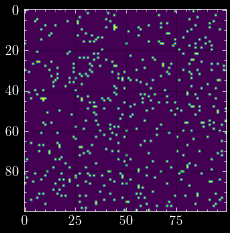

In [61]:
plt.imshow(A)

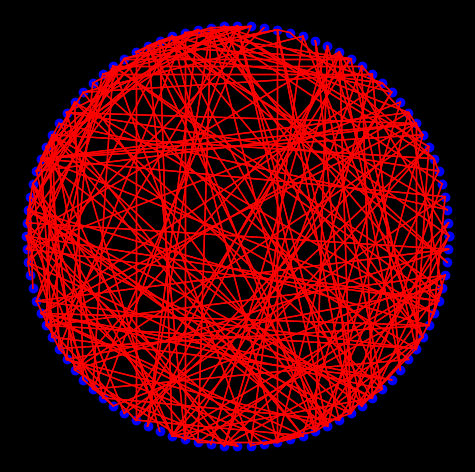

In [62]:
# plot a circle where the n nodes lay on, and draw the connections between the nodes according to the Adjacent matrix A
def plot_ErdosRenyi(A):
    n = A.shape[0]
    dAngle = 2*np.pi/n
    r = 1
    x = r*np.cos(np.linspace(0,2*np.pi,n+1))
    y = r*np.sin(np.linspace(0,2*np.pi,n+1))
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.plot(x,y,'o',color='blue')
    for i in range(n):
        for j in range(n):
            if A[i,j] == 1:
                plt.plot([x[i],x[j]],[y[i],y[j]],color='red')
    plt.show()


plot_ErdosRenyi(A)

In [63]:
def getDegree(A):
    # get the sum over one axis, e.g the columns
    return np.sum(A,axis=1, dtype='int')

In [64]:
def probabilityDegreeTheoretical(ks, n, p):
    r = np.zeros(len(ks))
    for k in ks:
        tmp1 = (comb(n-1,k))
        tmp2 = ((p**k) *((1-p)**(n-1-k)))
        r[k] = tmp1 * tmp2
    return  r


7.1 c)

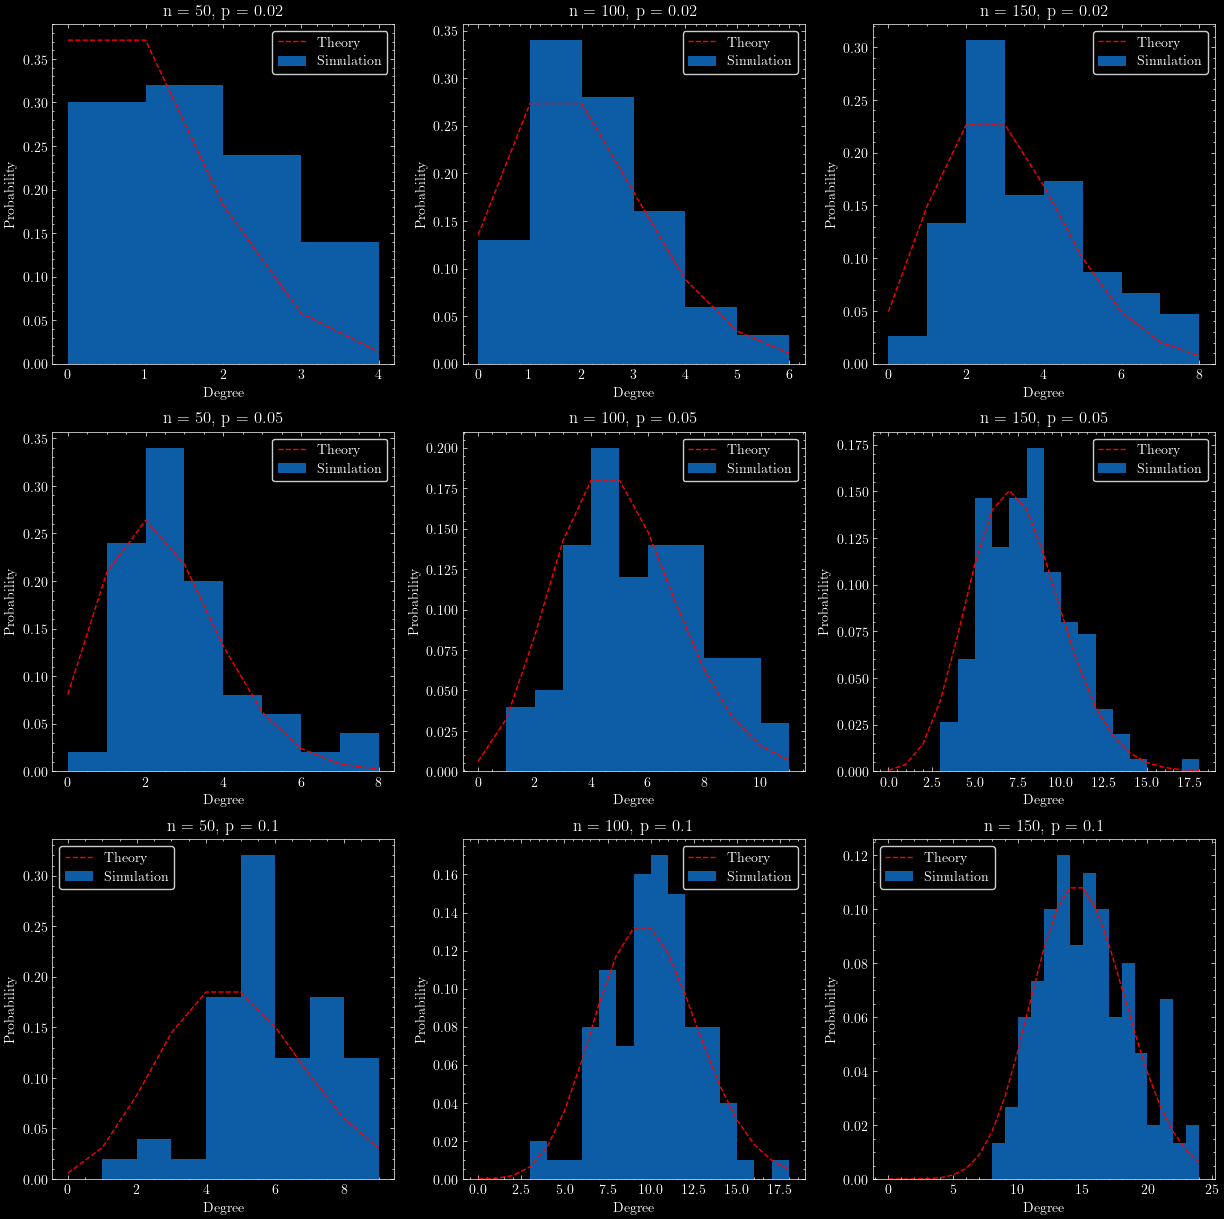

In [65]:
# plot the degree for various dimensions n and p
prob = np.array([0.02,0.05,0.1])
dim = np.array([50,100,150])

# create a subplot for each probability and dimension
fig, axs = plt.subplots(len(prob),len(dim), figsize=(15,15))

for p in range(len(prob)):
    for n in range(len(dim)):
        A = erdos_renyi(dim[n],prob[p])
        degree = getDegree(A)

        # plot the histogram of the degree distribution
        # bins need to depend on bincount of degree
        bins = np.arange(0,degree.max()+1)
        axs[p,n].hist(degree, bins=bins, density=True)
        axs[p,n].set_title("n = {}, p = {}".format(dim[n],prob[p]))
        axs[p,n].set_xlabel("Degree")

        # plot the theoretical degree distribution
        ks = np.arange(0,degree.max()+1)
        axs[p,n].plot(ks, probabilityDegreeTheoretical(ks, dim[n], prob[p]), '--', color='red')
        axs[p,n].legend(['Theory','Simulation'])
        axs[p,n].set_ylabel("Probability")
        

        
plt.show()
        

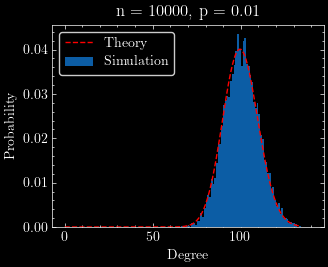

In [66]:
# Show that gaussian distribution is the limit of the binomial distribution
n = 10000
p = 0.01

# plot the histogram of the degree distribution and the theoretical degree distribution
A = erdos_renyi(n,p)
degree = getDegree(A)

# plot the histogram of the degree distribution
# bins need to depend on bincount of degree
bins = np.arange(0,degree.max()+1)

plt.hist(degree, bins=bins, density=True)
plt.title("n = {}, p = {}".format(n,p))
plt.xlabel("Degree")

# plot the theoretical degree distribution
ks = np.arange(0,degree.max()+1)
plt.plot(ks, probabilityDegreeTheoretical(ks, n, p), '--', color='red')
plt.legend(['Theory','Simulation'])
plt.ylabel("Probability")
plt.show()